In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
daily_train = pd.read_csv('Daily-train.csv')
daily_test = pd.read_csv('Daily-test.csv')

daily_train[:10].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
daily_train = daily_train.iloc[0,:]

In [233]:
daily_test = daily_test.iloc[0,:]

In [235]:
daily_test = daily_test.iloc[1:]
daily_test

V2     2039.2
V3     2035.0
V4     2051.8
V5     2061.8
V6     2063.5
V7     2069.5
V8     2054.0
V9     2057.0
V10    2062.8
V11    2066.4
V12    2067.4
V13    2071.4
V14    2083.8
V15    2080.6
Name: 0, dtype: object

In [212]:
daily_train = daily_train.dropna()
daily_train

V1           D1
V2       1017.1
V3       1019.3
V4       1017.0
V5       1019.2
          ...  
V1003    2015.6
V1004    2009.7
V1005    2022.1
V1006    2031.6
V1007    2029.7
Name: 0, Length: 1007, dtype: object

In [237]:
new_index = pd.RangeIndex(start=0, stop=len(daily_train))
daily_train.index = new_index
daily_train

0       1017.1
1       1019.3
2       1017.0
3       1019.2
4       1018.7
         ...  
1001    2015.6
1002    2009.7
1003    2022.1
1004    2031.6
1005    2029.7
Name: 0, Length: 1006, dtype: object

In [278]:
len(daily_train)

1006

In [274]:
new_index = pd.RangeIndex(start=len(daily_train), stop=len(daily_train)+ len(daily_test))
daily_test.index = new_index
daily_test

1006    2039.2
1007    2035.0
1008    2051.8
1009    2061.8
1010    2063.5
1011    2069.5
1012    2054.0
1013    2057.0
1014    2062.8
1015    2066.4
1016    2067.4
1017    2071.4
1018    2083.8
1019    2080.6
Name: 0, dtype: object

In [213]:
daily_train = daily_train.iloc[1:]

In [236]:
len(daily_train)

1006

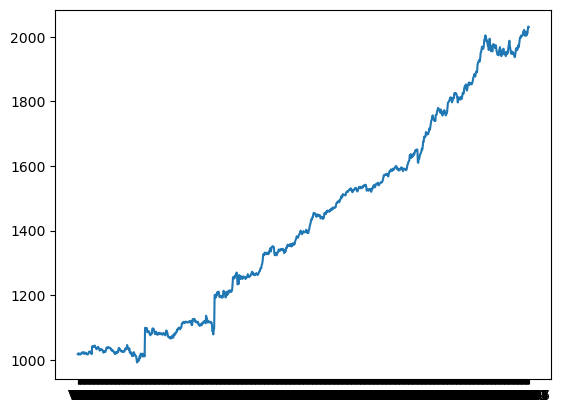

In [215]:
plt.plot(daily_train)

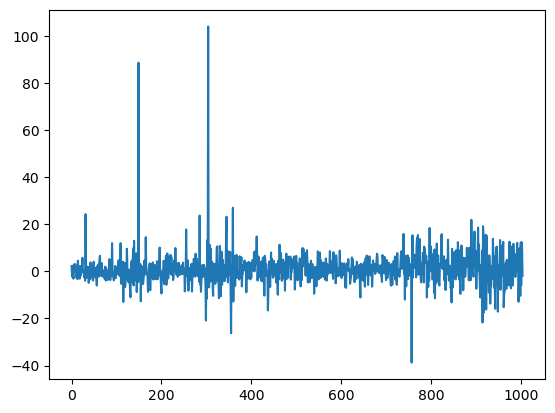

In [216]:
first_diff = np.diff(daily_train, n=1)
plt.plot(first_diff)

In [218]:
# Testing For Stationarity in our data with Dickey - Fuller Test
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result=adfuller(data)
    p_value = result[1]
    #labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    #for value,label in zip(result,labels):
        #print(label+' : '+str(value) )
    if p_value <= 0.05:
        print(f"The p-value of Dickey-Fuller test is {p_value}\nSo we reject the null hypothesis(Ho). Data is stationary")
    else:
        print(f"The p-value Dickey-Fuller test is {p_value}\nSo we accept the null hypothesis(Ho). Data is not stationary and we need to fix that to use ARIMA.")

adfuller_test(first_diff)

The p-value of Dickey-Fuller test is 0.0
So we reject the null hypothesis(Ho). Data is stationary


In [253]:
mean = first_diff.mean()
std = first_diff.std()
mean,std

(1.0075621890547264, 7.243856379795758)

In [257]:
type(mean)

numpy.float64

In [254]:
from scipy.stats import normaltest,kstest,anderson,shapiro
statistic, p_value = normaltest(first_diff.astype(float))
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("p-value:", p_value)

Test statistic: 1045.0693728517201
p-value: 1.1643112189315607e-227


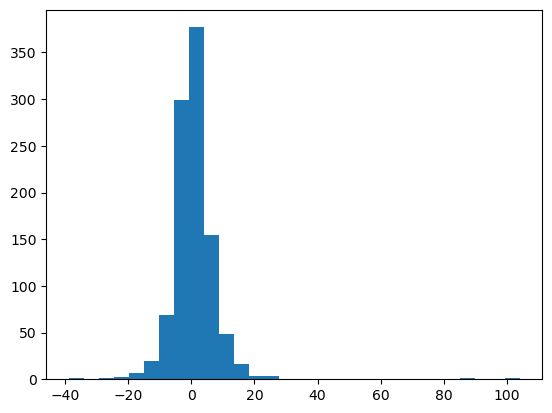

In [247]:
plt.hist(first_diff, bins=30)
plt.show()

/tmp/ipykernel_56237/1871680334.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(daily_test[-100:], label = 'test')


"'\ny_hat_naive['naive_forecast'].iloc[1:] = train['D1'][train_len-1]\n"

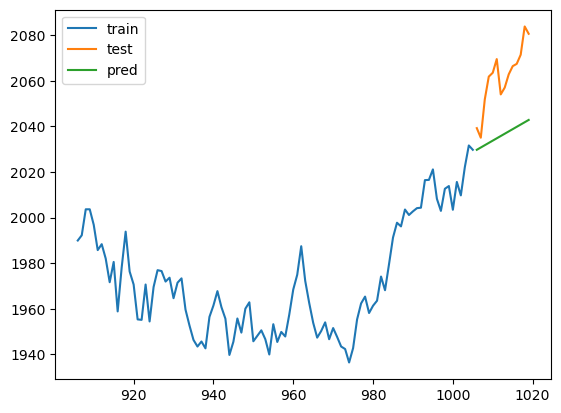

In [316]:
forecast = []
for t in range(len(daily_test)):
    if t == 0:
        forecast.append(daily_train[1005])
    else:
        forecast.append(forecast[t-1] + mean)
forecast_index = range(len(daily_train), len(daily_train) + len(daily_test))

plt.plot(daily_train[-100:], label = 'train')
plt.plot(daily_test[-100:], label = 'test')
plt.plot(forecast_index,forecast, label = 'pred')
plt.legend()

''''
y_hat_naive['naive_forecast'].iloc[1:] = train['D1'][train_len-1]
'''

In [223]:
#We need to check the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import 

In [220]:
coef = acf(first_diff)
coef

array([ 1.00000000e+00, -2.97718005e-02,  9.63346841e-03,  7.20081820e-04,
       -5.43336452e-02, -5.50349971e-02, -1.18425713e-02, -9.05447820e-03,
        2.06241890e-02,  1.32645611e-03,  4.09058498e-03, -5.25520914e-02,
       -1.40195663e-02,  1.23762128e-02,  3.31640061e-02, -4.40894659e-03,
        8.68968134e-03,  1.31192049e-02, -6.92723426e-02,  5.94452719e-02,
       -6.15621995e-03, -1.52527279e-02, -3.57254919e-02,  3.09161595e-02,
       -6.03564034e-02, -2.26056825e-02,  4.73102982e-02, -6.60556441e-03,
        1.12721790e-02, -6.25824161e-03, -2.23309315e-03])

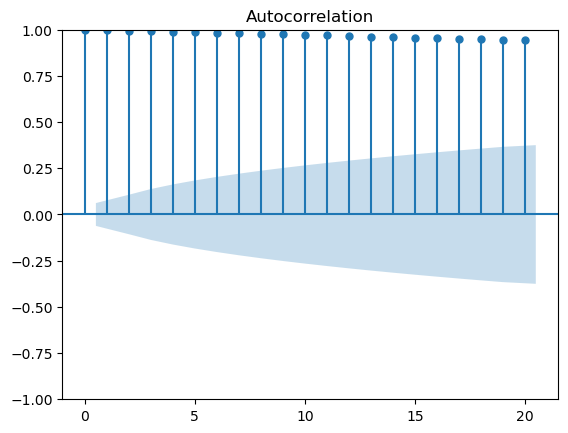

In [225]:
plot_acf(daily_train,lags = 20);

/home/andreas/anaconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


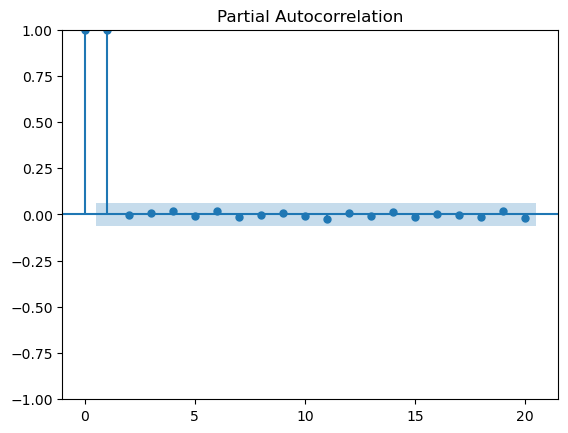

In [226]:
plot_pacf(daily_train,lags = 20);

In [64]:
noise = np.diff(series, n = 1)

Text(0.5, 1.0, 'Noise')

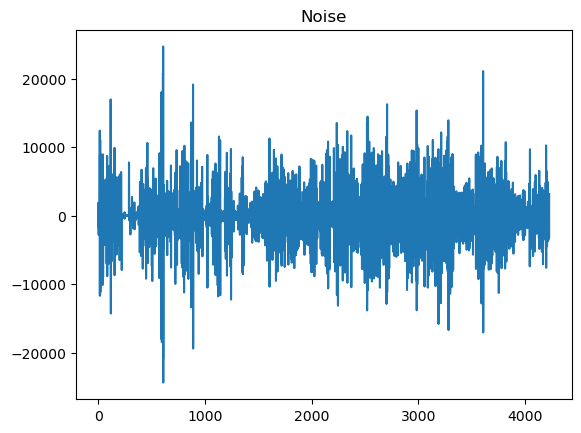

In [77]:
plt.plot(noise)
plt.title('Noise')


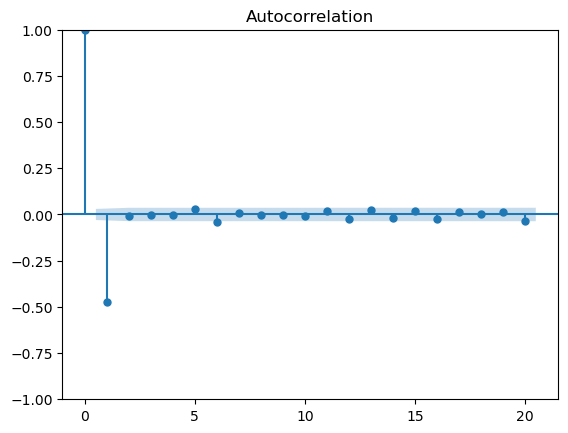

In [66]:
plot_acf(noise,lags = 20);

In [104]:
drift = noise.mean()
drift

0.7381684808329305

In [108]:
std = noise.std()
std

3491.567238461169

In [79]:
len(series)

4227

In [78]:
len(noise)

4226

In [123]:
forecast = []
noise = np.random.normal(drift,std,len(series))
for t in range(len(series)-1):
    if t == 0:
        forecast.append(None)
    else: 
        f = series[t-1] + noise[t]
        forecast.append(f)

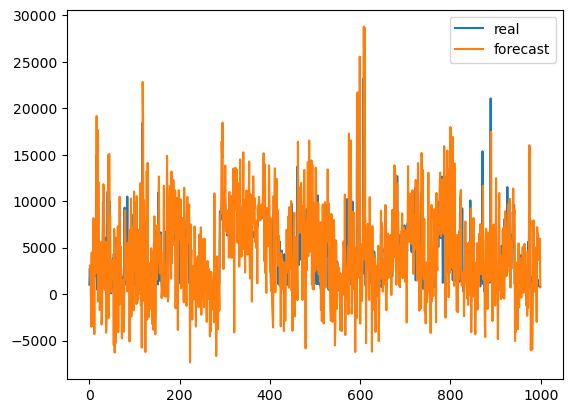

In [129]:
plt.plot(series[:1000], label = 'real')
plt.plot(forecast[:1000], label = 'forecast')
plt.legend()
